#Data Analysis / Plots

In this notebook, we take the cleaned output csv files from the data cleaning notebook and perform further data analysis and plot various output plots and/or tables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Personal Savings Data

We start by plotting the personal savings of americans over time

In [2]:
#read data
income_disposition = pd.read_csv("cleaned_data/updated_data/savings_updated.csv")
#select desired rows
savings = income_disposition.iloc[33:35,:]
savings.head()

,Unnamed: 0,type,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,2017.8,...,2022.6,2022.7,2022.8,2022.9,2022.10,2022.11,2022.12,2023.1,2023.2,2023.3
33,34,Equals: Personal saving,1000475.0,1043455.0,1047106.0,1071775.0,1156955.0,1113208.0,1130860.0,1133958.0,...,506322.0,644707.0,606390.0,574355.0,646393.0,781809.0,848314.0,885058.0,951637.0,1001892.0
34,35,Personal saving as a percentage of disposa...,6.9,7.2,7.2,7.3,7.8,7.5,7.6,7.6,...,2.7,3.5,3.2,3.0,3.4,4.1,4.4,4.5,4.8,5.1


Text(0.5, 1.0, 'Savings Over Time')

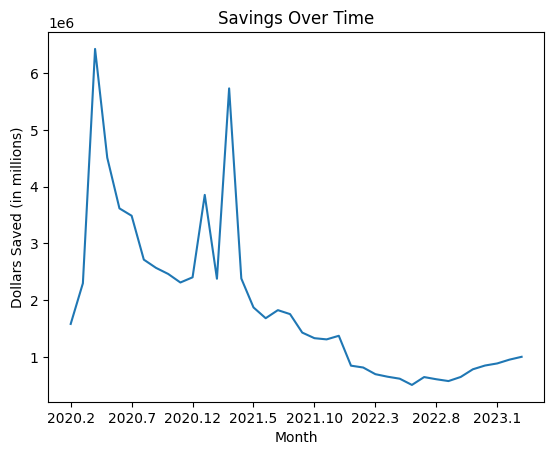

In [3]:
#plot savings
saving = savings.iloc[0, 39:]
saving.plot()
plt.xlabel("Month")
plt.ylabel("Dollars Saved (in millions)")
plt.title("Savings Over Time")

We can notice that in March 2020 (2020.3) and early 2021 there are large increases in personal savings. This implies that these are times that people were not spending as much money. This is a measure of fear of the pandemic in Americans. 

## Covid Cases Data

Here we will be looking at the updated covid number csv file. We want to plot the average number of covid cases over time.

Text(0, 0.5, 'Avg. Cases')

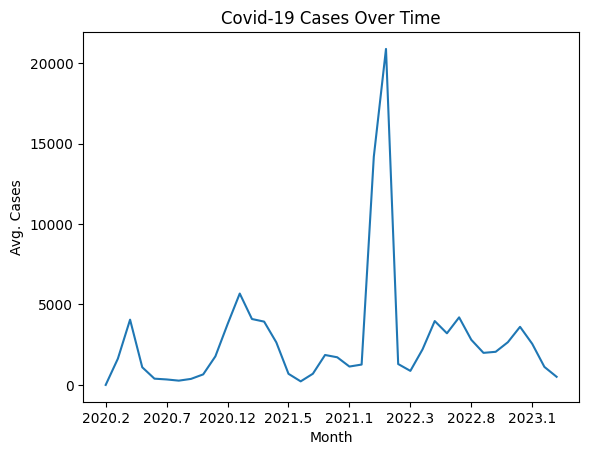

In [4]:
#read data
covid_numbers = pd.read_csv("cleaned_data/updated_data/covid_numbers_updated.csv")
covid_numbers = covid_numbers[["cases", "year_month"]]
covid_numbers["year_month"] = covid_numbers.year_month.astype(str)
covid_numbers.set_index('year_month', inplace=True)
#plot data
covid_numbers = covid_numbers.transpose()
covid_numbers = covid_numbers.iloc[0,0:-1]
covid_numbers.plot()
plt.title("Covid-19 Cases Over Time")
plt.xlabel("Month")
plt.ylabel("Avg. Cases")

## Savings Compared to Cases

Here we want to plot both the personal savings data and the covid cases data together. 

/var/folders/c2/2dx85tq52gxcn1_8bjq3gsvc0000gn/T/ipykernel_63738/439209421.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(month_names, rotation=45)


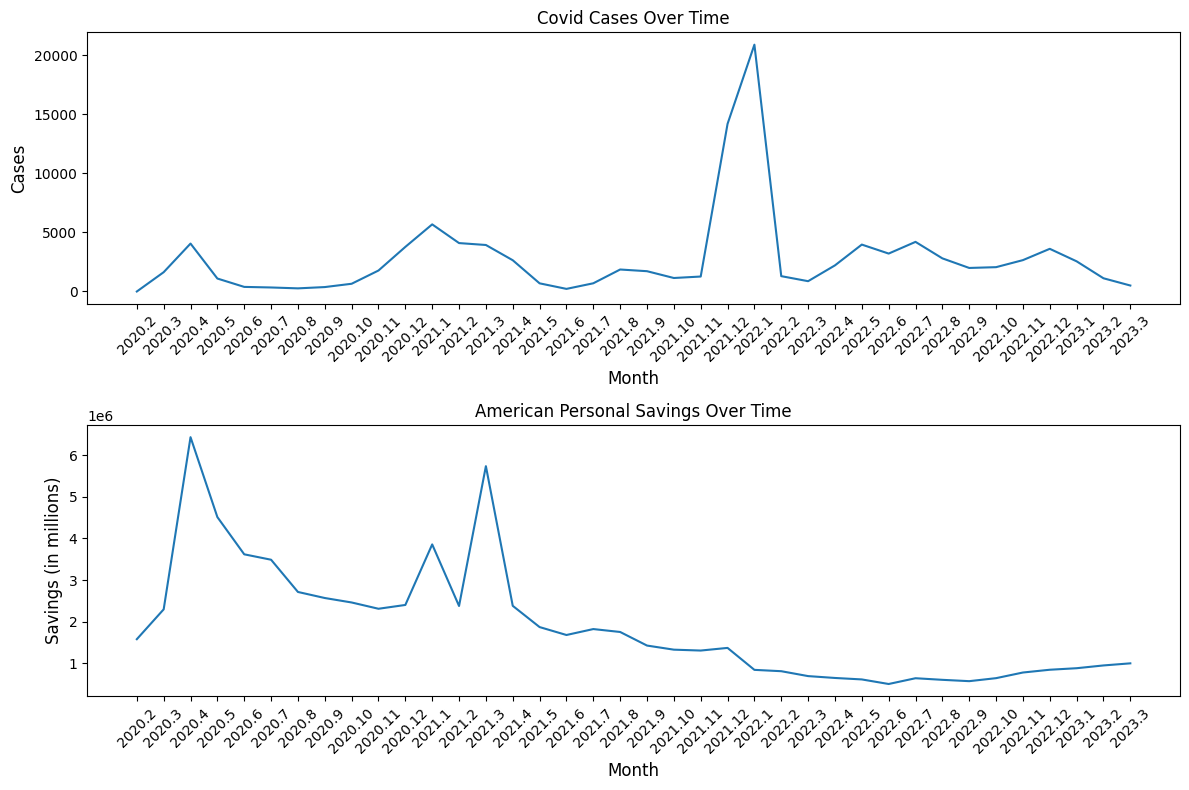

In [5]:
month_names = savings.columns[39:]

def set_plot(ax, y_data, x_lab = "X_label", y_lab = "Y_label", title = "Title", fontsize=12):
    ax.plot(month_names, y_data)
    ax.set_xticklabels(month_names, rotation=45)
    ax.set_xlabel(x_lab, fontsize=fontsize)
    ax.set_ylabel(y_lab, fontsize=fontsize)
    ax.set_title(title, fontsize=fontsize)

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
set_plot(ax1,covid_numbers,"Month","Cases", "Covid Cases Over Time" )
set_plot(ax2,saving, "Month", "Savings (in millions)", "American Personal Savings Over Time")
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.savefig("output/plots_output/Cases_vs_Savings.png")
plt.show()

By plotting the two plots, savings and the covid cases over each other, we can see that in 2020 (during the beginning of the pandemic) personal savings increased along with the number of covid cases. In other words, the more severe the the pandemic seemed, the more people saved money and not spending on businesses.

Here we perform some more analysis on the specific increases in covid cases and personal savings. We look at the percent changes of the months with the most significant changes. 

In [6]:
#calculating changes of 3 different time periods
savings_change1 = ((savings.iloc[0]['2020.4'] - savings.iloc[0]['2020.3']) / savings.iloc[0]['2020.3']) * 100
covid_change1 = ((covid_numbers.loc['2020.4'] - covid_numbers.loc['2020.3']) / covid_numbers.loc['2020.3']) * 100

savings_change2 = ((savings.iloc[0]['2021.1'] - savings.iloc[0]['2020.12']) / savings.iloc[0]['2020.12']) * 100
covid_change2 = ((covid_numbers.iloc[11] - covid_numbers.loc['2020.12']) / covid_numbers.loc['2020.12']) * 100 

savings_change3 = ((savings.iloc[0]['2022.1'] - savings.iloc[0]['2021.11']) / savings.iloc[0]['2021.11']) * 100
covid_change3 = (covid_numbers.iloc[23] - covid_numbers.iloc[21]) / covid_numbers.iloc[21]

print("Early Pandemic")
print("Percent Change in Savings: {:.2f}%".format(savings_change1))
print("Percent Change in Covid Cases: {:.2f}%".format(covid_change1))
print("Percent Change in Savings: {:.2f}%".format(savings_change2))
print("Percent Change in Covid Cases: {:.2f}%".format(covid_change2))
print("")
print("Late Pandemic")
print("Percent Change in Savings: {:.2f}%".format(savings_change3))
print("Percent Change in Covid Cases: {:.2f}%".format(covid_change3))


Early Pandemic
Percent Change in Savings: 179.77%
Percent Change in Covid Cases: 148.20%
Percent Change in Savings: 60.46%
Percent Change in Covid Cases: 50.50%

Late Pandemic
Percent Change in Savings: -35.39%
Percent Change in Covid Cases: 15.50%


We can see that in the early pandemic, savings increased when there were peaks in covid cases. But towards the end of the pandemic, savings actually decreased when covid cases rose.

## US Employment Data By Industry

Plotting US employment data 

In [7]:
#load data
US_small_bus = pd.read_csv("cleaned_data/updated_data/us_small_bus_updated.csv")
US_small_bus.head()

,Unnamed: 0,industry,2014,2015,2016,2017,2018,2019,2020,2021
0,1,Self-employed persons,9358.0,9508.0,9604.0,9525.0,9707.0,9539.0,9253.0,9956.0
1,2,"Agriculture, forestry, fishing, and hunting",757.0,843.0,852.0,790.0,766.0,741.0,741.0,737.0
2,3,Farms,680.0,760.0,771.0,711.0,684.0,664.0,669.0,669.0
3,4,"Forestry, fishing and related activities",77.0,83.0,81.0,79.0,82.0,77.0,72.0,68.0
4,5,Mining,20.0,20.0,17.0,11.0,9.0,14.0,10.0,13.0


In [8]:
#'melt' data for plotting
US_small_bus = US_small_bus.iloc[:,1:]
melted = pd.melt(US_small_bus, id_vars=['industry'], var_name='year', value_name='count')

We start by looking at trends in jobs throughout all the different recorded industries

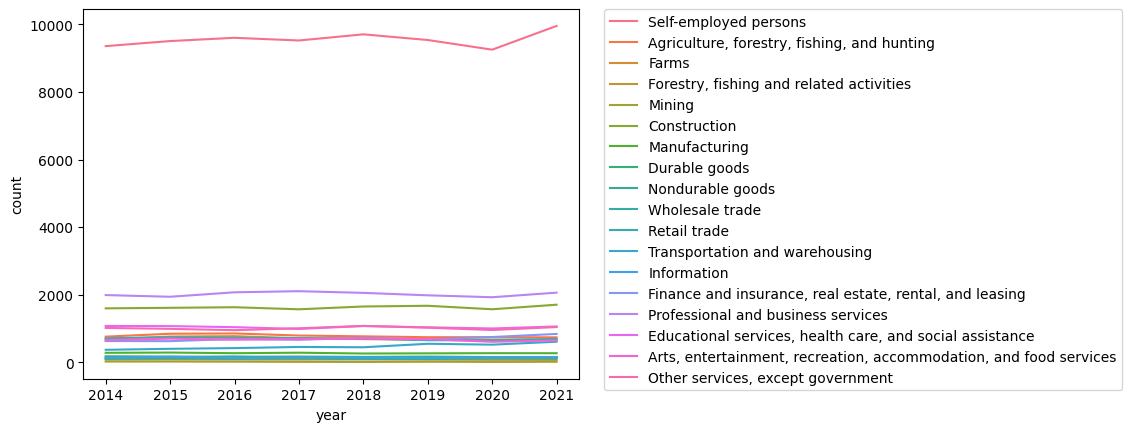

In [9]:
import seaborn as sns
# plot data using seaborn
sns.lineplot(x='year', y='count', hue='industry', data=melted)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig("output/plots_output/US_employment_by_ind.png")
plt.show()


We can see that self-employed workers had a more noticable drop in count during the pandemic in 2020. 

Next we can plot what self employed workers looked like over the years. 

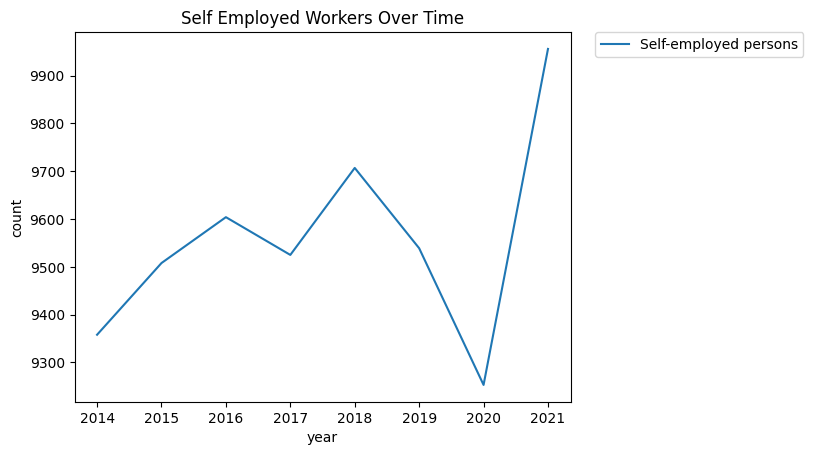

In [10]:
US_small_bus_only = US_small_bus.iloc[0:1,:]
melted2 = pd.melt(US_small_bus_only, id_vars=['industry'], var_name='year', value_name='count')
sns.lineplot(x='year', y='count', hue='industry', data=melted2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Self Employed Workers Over Time")
plt.savefig("output/plots_output/US_self_employed_over_time.png")
plt.show()

We notice that the number of self employed workers dropped from over 9,700 to under 9,300 during the year 2020. However, there was a massive recovery in self employed workers after 2020. 

## NYC Small Business License Data

In [11]:
#load business license by borough data
business_license_by_borough = pd.read_csv("cleaned_data/updated_data/business_license_by_borough_updated.csv")
business_license_by_borough

,Unnamed: 0,Year,Borough,Opened Licenses
0,0,1977,BROOKLYN,1
1,1,1981,NEW YORK,1
2,2,1982,BROOKLYN,1
3,3,1984,BROOKLYN,1
4,4,1984,NEW YORK,1
...,...,...,...,...
177,177,2022,STATEN ISLAND,261
178,178,2023,BROOKLYN,431
179,179,2023,NEW YORK,226
180,180,2023,BRONX,245


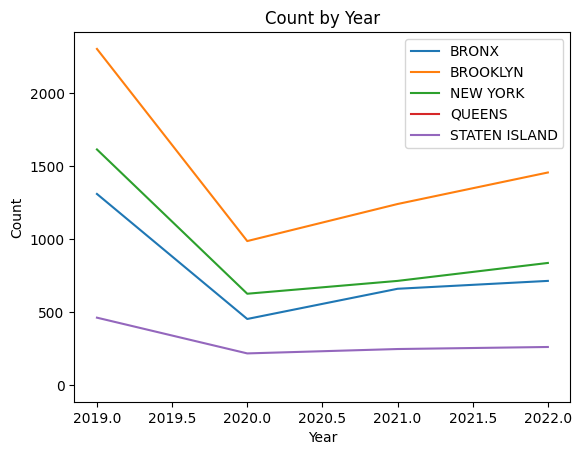

In [12]:
#plot data
business_license_by_borough = business_license_by_borough[business_license_by_borough['Year'] > 2018]
business_license_by_borough = business_license_by_borough[business_license_by_borough['Year'] < 2023]
business_license_by_borough = business_license_by_borough[business_license_by_borough['Borough'] != 'MANHATTAN']
grouped_boroughs = business_license_by_borough.groupby('Borough')
for name, group in grouped_boroughs:
    plt.plot(group['Year'], group['Opened Licenses'], label=name)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count by Year')
plt.legend()
plt.savefig("output/plots_output/license_by_borough.png")
plt.show()

In [13]:
#read updated business license data
business_license_by_year = pd.read_csv("cleaned_data/updated_data/business_license_by_year_updated.csv")
business_license_by_year = business_license_by_year[business_license_by_year['Year'] > 2018]
business_license_by_year = business_license_by_year[business_license_by_year['Year'] < 2023]
business_license_by_year = business_license_by_year.drop(columns = ['Unnamed: 0'])
business_license_by_year['Percent Change'] = business_license_by_year['Opened Licenses'].pct_change()
display(business_license_by_year)

,Year,Opened Licenses,Percent Change
38,2019,5692,NaN
39,2020,2284,-0.598735
40,2021,2863,0.253503
41,2022,3269,0.141809


We notice from 2019 to 2020 there was a nearly 60% drop in the number of opened business licenses. This may help demonstrate the impact covid had on new small businesses. In 2021 and 2022 there were two consecutive years of growth in small businesses. 

##Federal Funds Rate Data

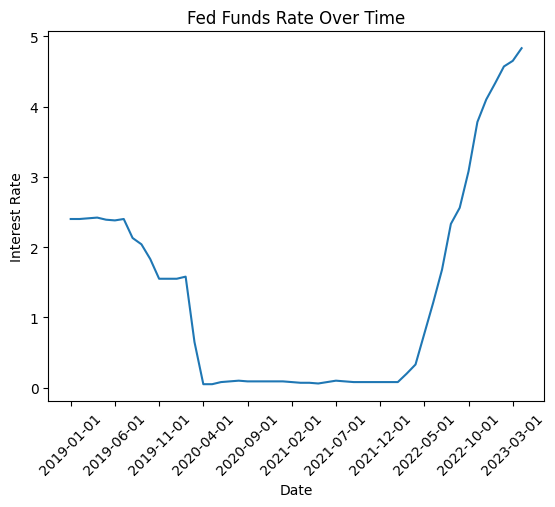

In [14]:
#open and plot interest rate data
interest_rates = pd.read_csv("data/proj_data_raw/FEDFUNDS.csv")
x = interest_rates['DATE']
y = interest_rates['FEDFUNDS']
plt.plot(x,y)
plt.xlabel("Date")
plt.ylabel("Interest Rate")
plt.title("Fed Funds Rate Over Time")
plt.xticks(rotation=45)
plt.xticks([x[0],x[5],x[10],x[15],x[20],x[25],x[30],x[35],x[40],x[45],x[50]])
plt.savefig("output/plots_output/interest_rate.png")
plt.show()

A potential reason for the recovery of small businesses during the pandemic could be in the interst rates. The Federal Reserve lowered interest rates to nearly 0% which allowed people to loan money at lower rates helping their business.